<p style="font-name: monospace; line-height: 2; font-size: 30px; font-weight: bold; letter-spacing: 2px; text-align: center;">Sales Data Analysis</p>

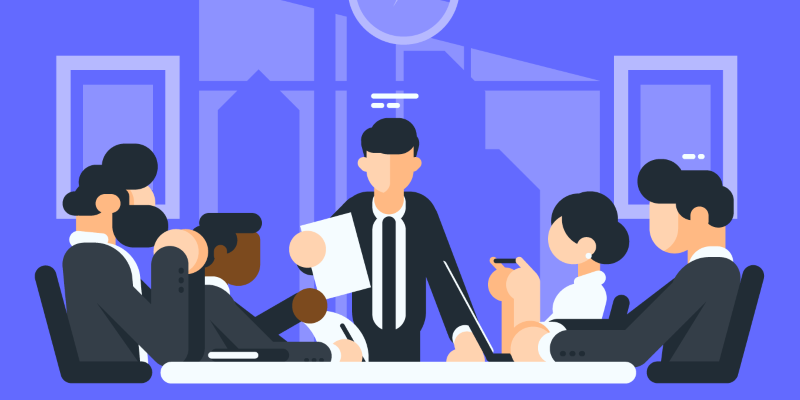

1. [Context](#context)
2. [Import Libraries](#lib)
3. [Data Preprocessing](#pre)
4. [Data Preparation](#preparation)
5. [Data Analysis](#analysis)
    
    + [What was the best month for sales in 2019 ? How much was earned that month ?](#month)
    + [What City had the highest number of sales?](#city)
    + [What time should we display adverstisement to maximize likelihood of customer's buying product?](#hour)
    + [What product sold the most? Why do you think it sold the most?](#product)
    + [What products are most often sold together?](#pro)
    + [How much probability for next people will ordered USB-C Charging Cable?](#USB)
    + [How much probability for next people will ordered iPhone?](#iphone)
    + [How much probability for next people will ordered Google Phone?](#google)
    + [How much probability other peoples will ordered Wired Headphones?](#head)
 
 
6. [Conclusion](#Conclusion)    

<a id="context"></a>

# Context

Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.


## **Content**
​
* `Order ID` - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
* `Product` - The product that have been sold.
* `Quantity Ordered` - Ordered Quantity is the total item quantity ordered in the initial order (without any changes). 
* `Price Each` - The price of each products.
* `Order Date` - This is the date the customer is requesting the order be shipped. 
* `Purchase Address` - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.
​
---
​
## **Target**
​
A target market analysis is an assessment of how your product or service fits into a specific market and where it will gain the most.
​
---
​
## **Task:**
​
* Q: What was the best month for sales? How much was earned that month? 
* Q: What City had the highest number of sales? 
* Q: What time should we display adverstisement to maximize likelihood of customer's buying product? 
* Q: What product sold the most? Why do you think it sold the most?
* Q: What products are most often sold together? 
​
​
---
​
## **How Much Probability?**
​
* How much probability for next people will ordered USB-C Charging Cable? 
* How much probability for next people will ordered iPhone? 
* How much probability for next people will ordered Google Phone? 
* How much probability other peoples will ordered Wired Headphones? 

<a id="lib"></a>
# Import Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
set_seed()

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 25)
pd.set_option("display.max_rows", 25)

<a id="3"></a>

## Merge the 12 months of sales data into a single CSV file

In [2]:
# let's make a list compreension for all the data in the folder
files = [file for file in os.listdir('./Sales-Data')]

# let's make a pandas DataFrame
all_months = pd.DataFrame()

# makes a loop for concat the data
for file in files:
    data = pd.read_csv('./Sales-Data/' + file)
    all_months = pd.concat([all_months,data])

# export all data to csv    
all_months.to_csv('all_data.csv', index = False)    


# Read in Updated Data Frame

In [3]:
df = pd.read_csv('all_data.csv')

In [4]:
#read the first five rows
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
# read the last five rows
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


<a id="pre"></a>

# Data Preprocessing

Data preprocessing can refer to manipulation or dropping of data before it is used in order to ensure or enhance performance, and is an important step in the data mining process. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects.

In [6]:
# getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB



## Uniqueness Categorical Variables
Let's have a look at categorical variables. How many unique values of these variables.

In [7]:
# getting the Uniqueness catrgorical variable
categorical = df.select_dtypes(['category', 'object']).columns
for col in categorical:
    print('{} : {} unique value(s)'.format(col, df[col].nunique()))

Order ID : 178438 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 24 unique value(s)
Order Date : 142396 unique value(s)
Purchase Address : 140788 unique value(s)



## How many missing data points do we have?
Ok, now we know that we do have some missing values. Let's see how many we have in each column.

In [8]:
# now how many missing values in each columns
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## Clean up the data 

In [9]:
# let's drop the rows of NaN data!
df = df.dropna(how='all')

In [10]:
# first lets replace uppercase to lowercase 
df.rename(columns=lambda x: x.strip().lower(), inplace = True)

In [11]:
# replace the space with uderscore:
df.columns = df.columns.str.replace(' ', '_')

### convert the dtype of the date column:

In [12]:
df = df[df['order_date'].str[0:2] != 'Or']

In [13]:
df['order_date'] =  pd.to_datetime(df['order_date'])
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### Convert the dtype of the quantity ordered and price :

In [14]:
# convert the quantity ordered to int :
df['quantity_ordered'] = df['quantity_ordered'].astype('int64')
df['price_each'] = df['price_each'].astype('float')

In [15]:
df.dtypes

order_id                    object
product                     object
quantity_ordered             int64
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
dtype: object

<a id="preparation"></a>

# Data Preparation
Data preparation is the act of manipulating raw data into a form that can readily and accurately be analysed, e.g. for business purposes. Data Preparation is a pre-processing step in which data from one or more sources is cleaned and transformed to improve its quality prior to its use in business analytics.

### First lets add year, month , hour & minute:

In [16]:
# add the year column :
df['year'] = df['order_date'].dt.year

# add the month column :
df['month'] = df['order_date'].dt.month

# add the hour column :
df['hour'] = df['order_date'].dt.hour

# add the minute column :
df['minute'] = df['order_date'].dt.minute

### Second lets add the sales column:

In [17]:
# add sales column by multiplying the quantity of each order by the price : 
df['sales'] = df['quantity_ordered'] * df['price_each']

### finally lets add cities column:

In [18]:
def city(df):
    
    """
    adding the city column 
    into our data 
    
    """
    
    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    df['cities'] = df['purchase_address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
                                                
    return df

df = city(df)
df.head()                                                

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,year,month,hour,minute,sales,cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,11.99,Los Angeles (CA)


<a id="analysis"></a>

# Data Analysis
Data Analysis is the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data. Indeed, researchers generally analyze for patterns in observations through the entire data collection phase (Savenye, Robinson,  2004 ). analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

Or, the easier, you can say in Data Analysis we (Data Scientist or Data Analyst) what ever you want to call that, in this section, we're looking for the correlation and also the relationships between every data (features and labels) or the variables using and applying the statistical and visualization methods for looking some patterns.

### The correlation among all features:

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

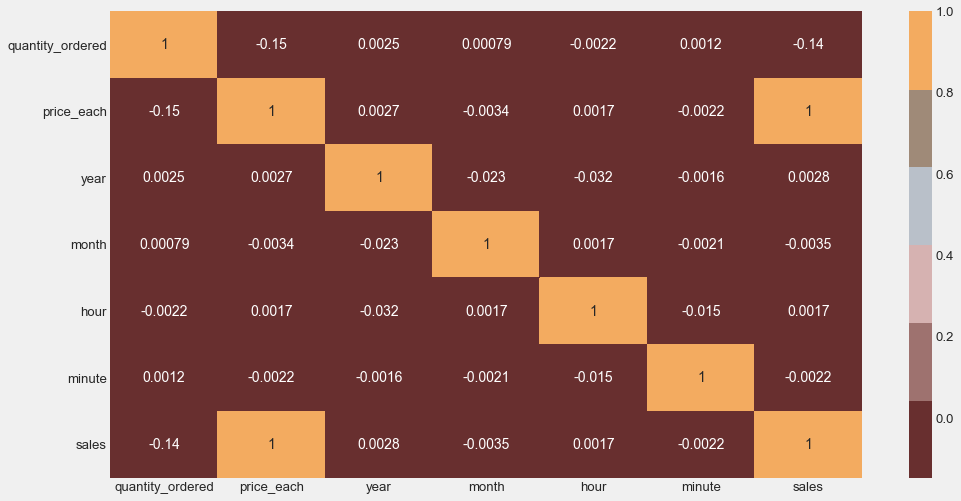

In [19]:
# lets see the correlation between the features:

cmap =(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(15,8))  
corr = df.corr()
sns.heatmap(corr, annot= True, cmap= cmap)
plt.show()

<a id="month"></a>

## What was the best month for sales in 2019 ? How much was earned that month ?

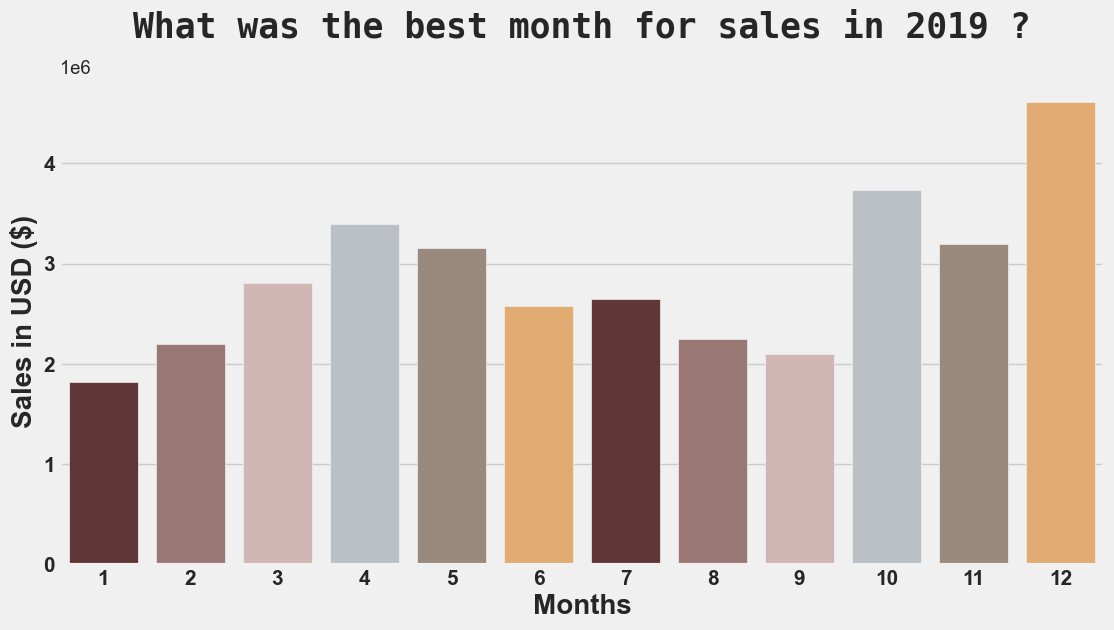

In [20]:
# setting the colors:
color =(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# group the Month cols
month_sales = df.groupby('month').sum().astype('int')

# let's plot it
plt.figure(dpi=100, figsize=(12, 6)) # figuring the size

# makes bar plot 
sns.barplot(x = month_sales.index, y = month_sales['sales'], data = month_sales, palette = color)

# putting the title:
plt.title('What was the best month for sales in 2019 ?', fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)

# putting the xlabel:
plt.xlabel('Months', weight= 'bold', fontsize = 20, loc = 'center')

# putting the xticks :
plt.xticks(weight= 'bold', fontsize = 15)

# putting the ylabel:
plt.ylabel('Sales in USD ($)', weight= 'bold', fontsize = 20, loc = 'center')

# putting the yticks :
plt.yticks(weight= 'bold', fontsize = 15)

plt.show();

In [21]:
# How much was earned in December ?
df.query("month == 12").groupby('month')['sales'].sum()

month
12    4.613443e+06
Name: sales, dtype: float64

### Answer:
> The best month for sales was **December**  which has a record number of sales reaching **$4.613.443**. This may be because in December there is Christmas and New year.

<a id="city"></a>

## What City had the highest number of sales?

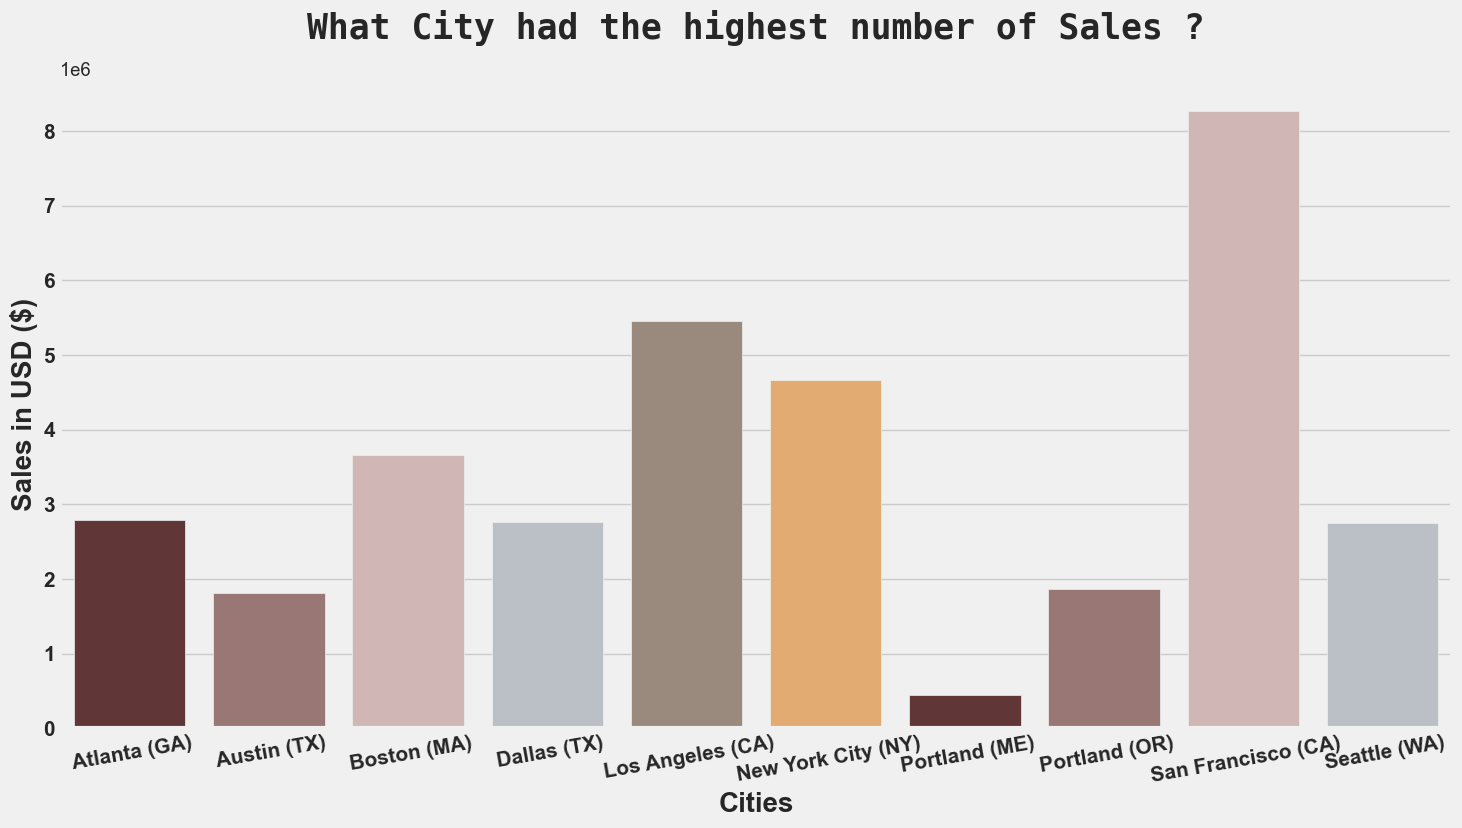

In [22]:
# group the Month cols
city_sales = df.groupby('cities').sum().astype('int')

# let's plot it
plt.figure(dpi=100, figsize=(16, 8)) # figuring the size

# makes bar plot 
sns.barplot(x = city_sales.index, y = city_sales['sales'], data = city_sales, palette = color)

# putting the title:
plt.title('What City had the highest number of Sales ?', fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)

# putting the xlabel:
plt.xlabel('Cities', weight= 'bold', fontsize = 20, loc = 'center')

# putting the xticks :
plt.xticks(weight= 'bold', fontsize = 15, rotation = 10)

# putting the ylabel:
plt.ylabel('Sales in USD ($)', weight= 'bold', fontsize = 20, loc = 'center')

# putting the yticks :
plt.yticks(weight= 'bold', fontsize = 15)

plt.show();

In [23]:
# total sales in san francisco:
df.groupby('cities')['sales'].sum()

cities
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: sales, dtype: float64

### Answer:
> **San Francisco** had the highest number of sales **$8.262.204**.

<a id="hour"></a>

##  What time should we display adverstisement to maximize likelihood of customer's buying product?

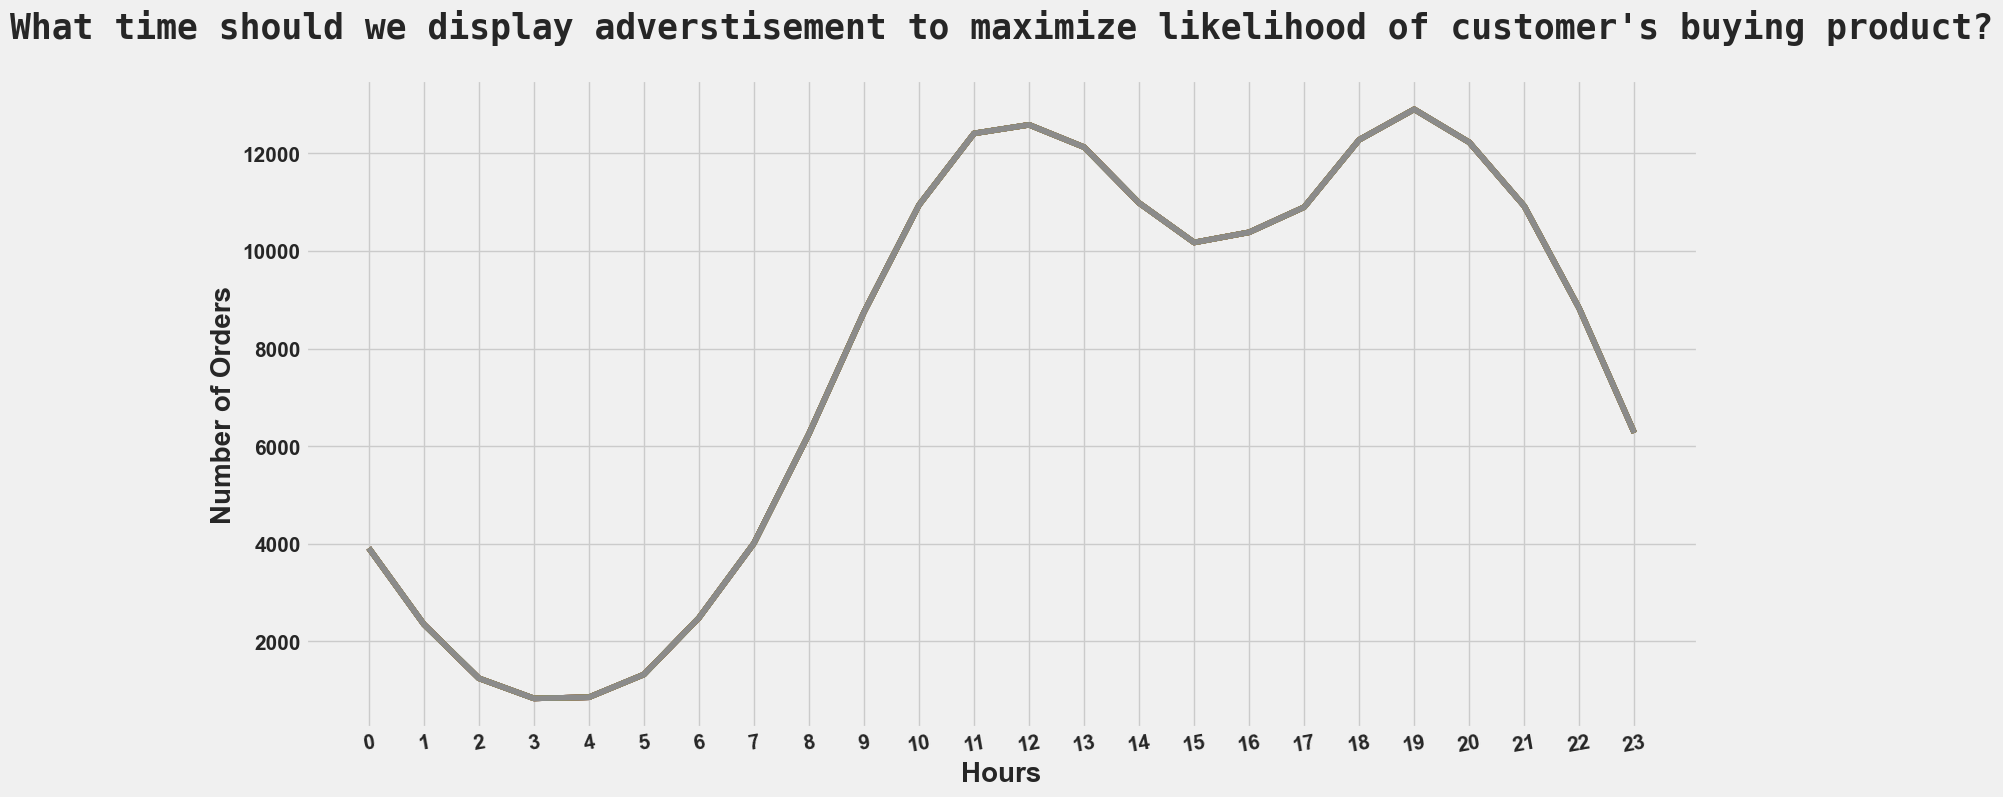

In [24]:
# let's prepare the value for the x-axis
hours = [hour for hour, df in df.groupby('hour')]

# let's plot it
plt.figure(dpi=100, figsize=(16, 8)) # figuring the size

# makes line plot 
plt.plot(hours , df.groupby(['hour']).count())

# putting the title:
plt.title("What time should we display adverstisement to maximize likelihood of customer's buying product?", fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)

# putting the xlabel:
plt.xlabel('Hours', weight= 'bold', fontsize = 20, loc = 'center')

# putting the xticks :
plt.xticks(ticks = hours, weight= 'bold', fontsize = 15 , rotation = 10)

# putting the ylabel:
plt.ylabel('Number of Orders', weight= 'bold', fontsize = 20, loc = 'center')

# putting the yticks :
plt.yticks(weight= 'bold', fontsize = 15)

plt.show();

### Answer :
> My recommendation that the best time to display ad at **11am or 12pm** because there is an increase in the number of orders at that time. 

<a id="product"></a>

## What product sold the most? Why do you think it sold the most?

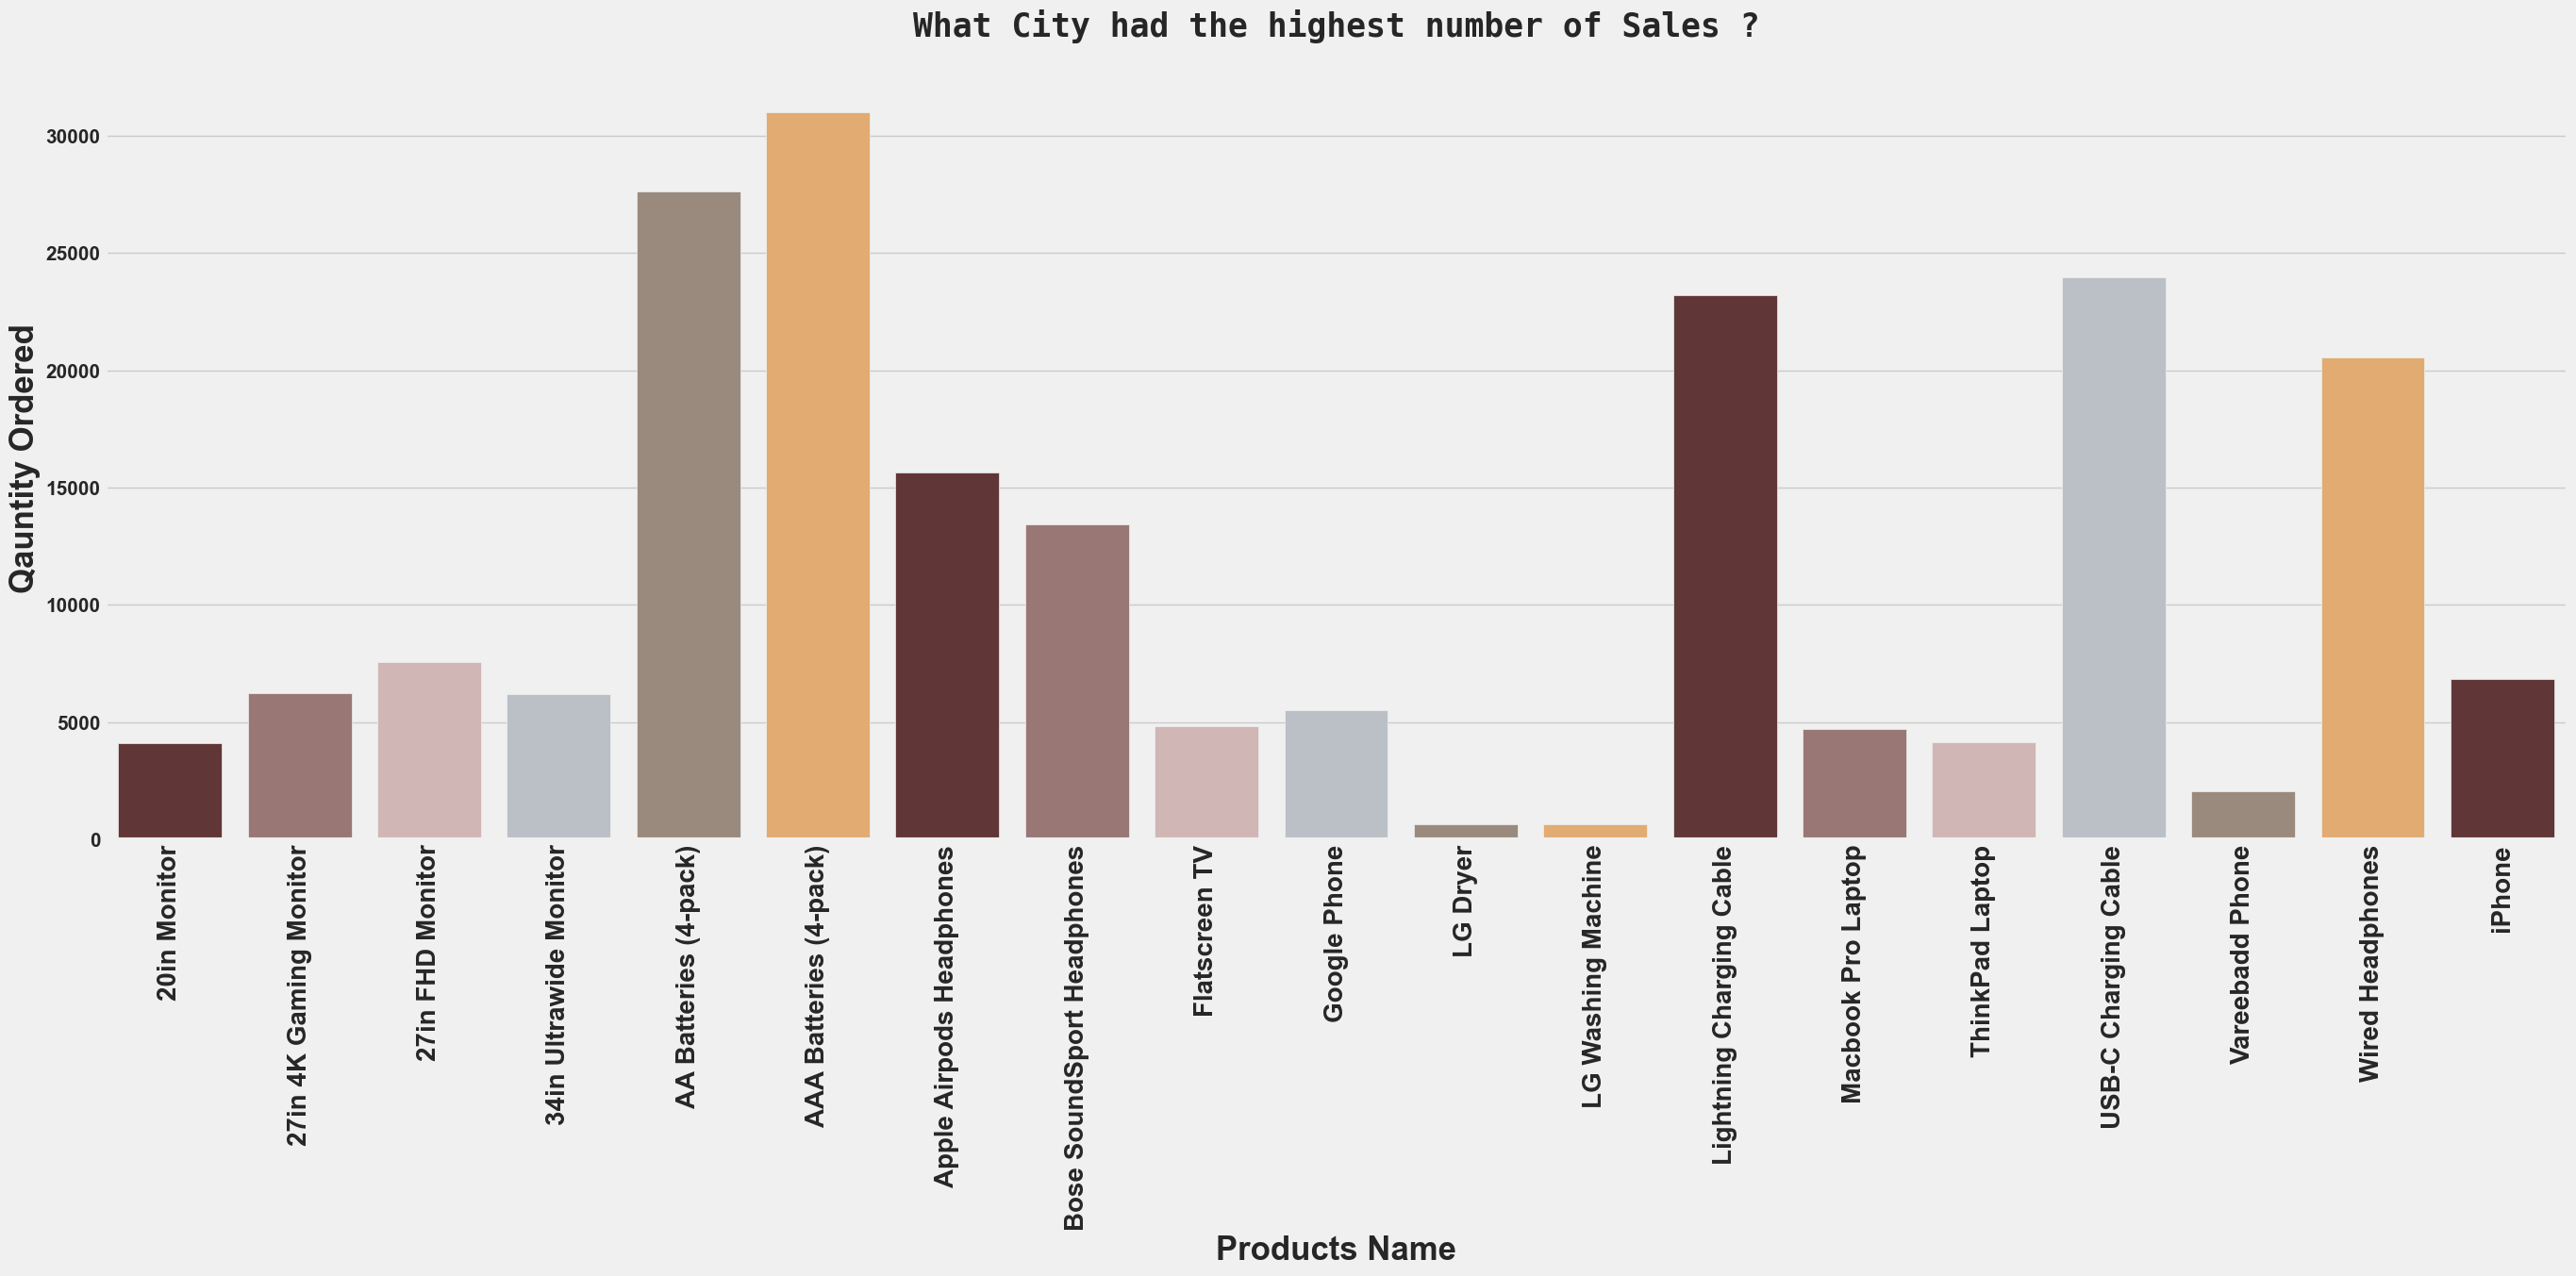

In [25]:
# group the product cols
products = df.groupby('product').sum().astype('int')

# let's plot it
plt.figure(dpi=100, figsize=(30, 10)) # figuring the size

# makes bar plot 
sns.barplot(x = products.index, y = products['quantity_ordered'], data = city_sales, palette = color)

# putting the title:
plt.title('What City had the highest number of Sales ?', fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)

# putting the xlabel:
plt.xlabel('Products Name', weight= 'bold', fontsize = 25, loc = 'center')

# putting the xticks :
plt.xticks(weight= 'bold', fontsize = 20, rotation = 'vertical')

# putting the ylabel:
plt.ylabel('Qauntity Ordered', weight= 'bold', fontsize = 25, loc = 'center')

# putting the yticks :
plt.yticks(weight= 'bold', fontsize = 15)

plt.show();

### Answer:

The products were sold the most are : 
- AAA Batteries (4-pack)
- AA Batteries (4-pack)
- Lightning Charging Cables
- USB-C Charging Cable
- Wired Headphones

### Why do you think it sold the most?

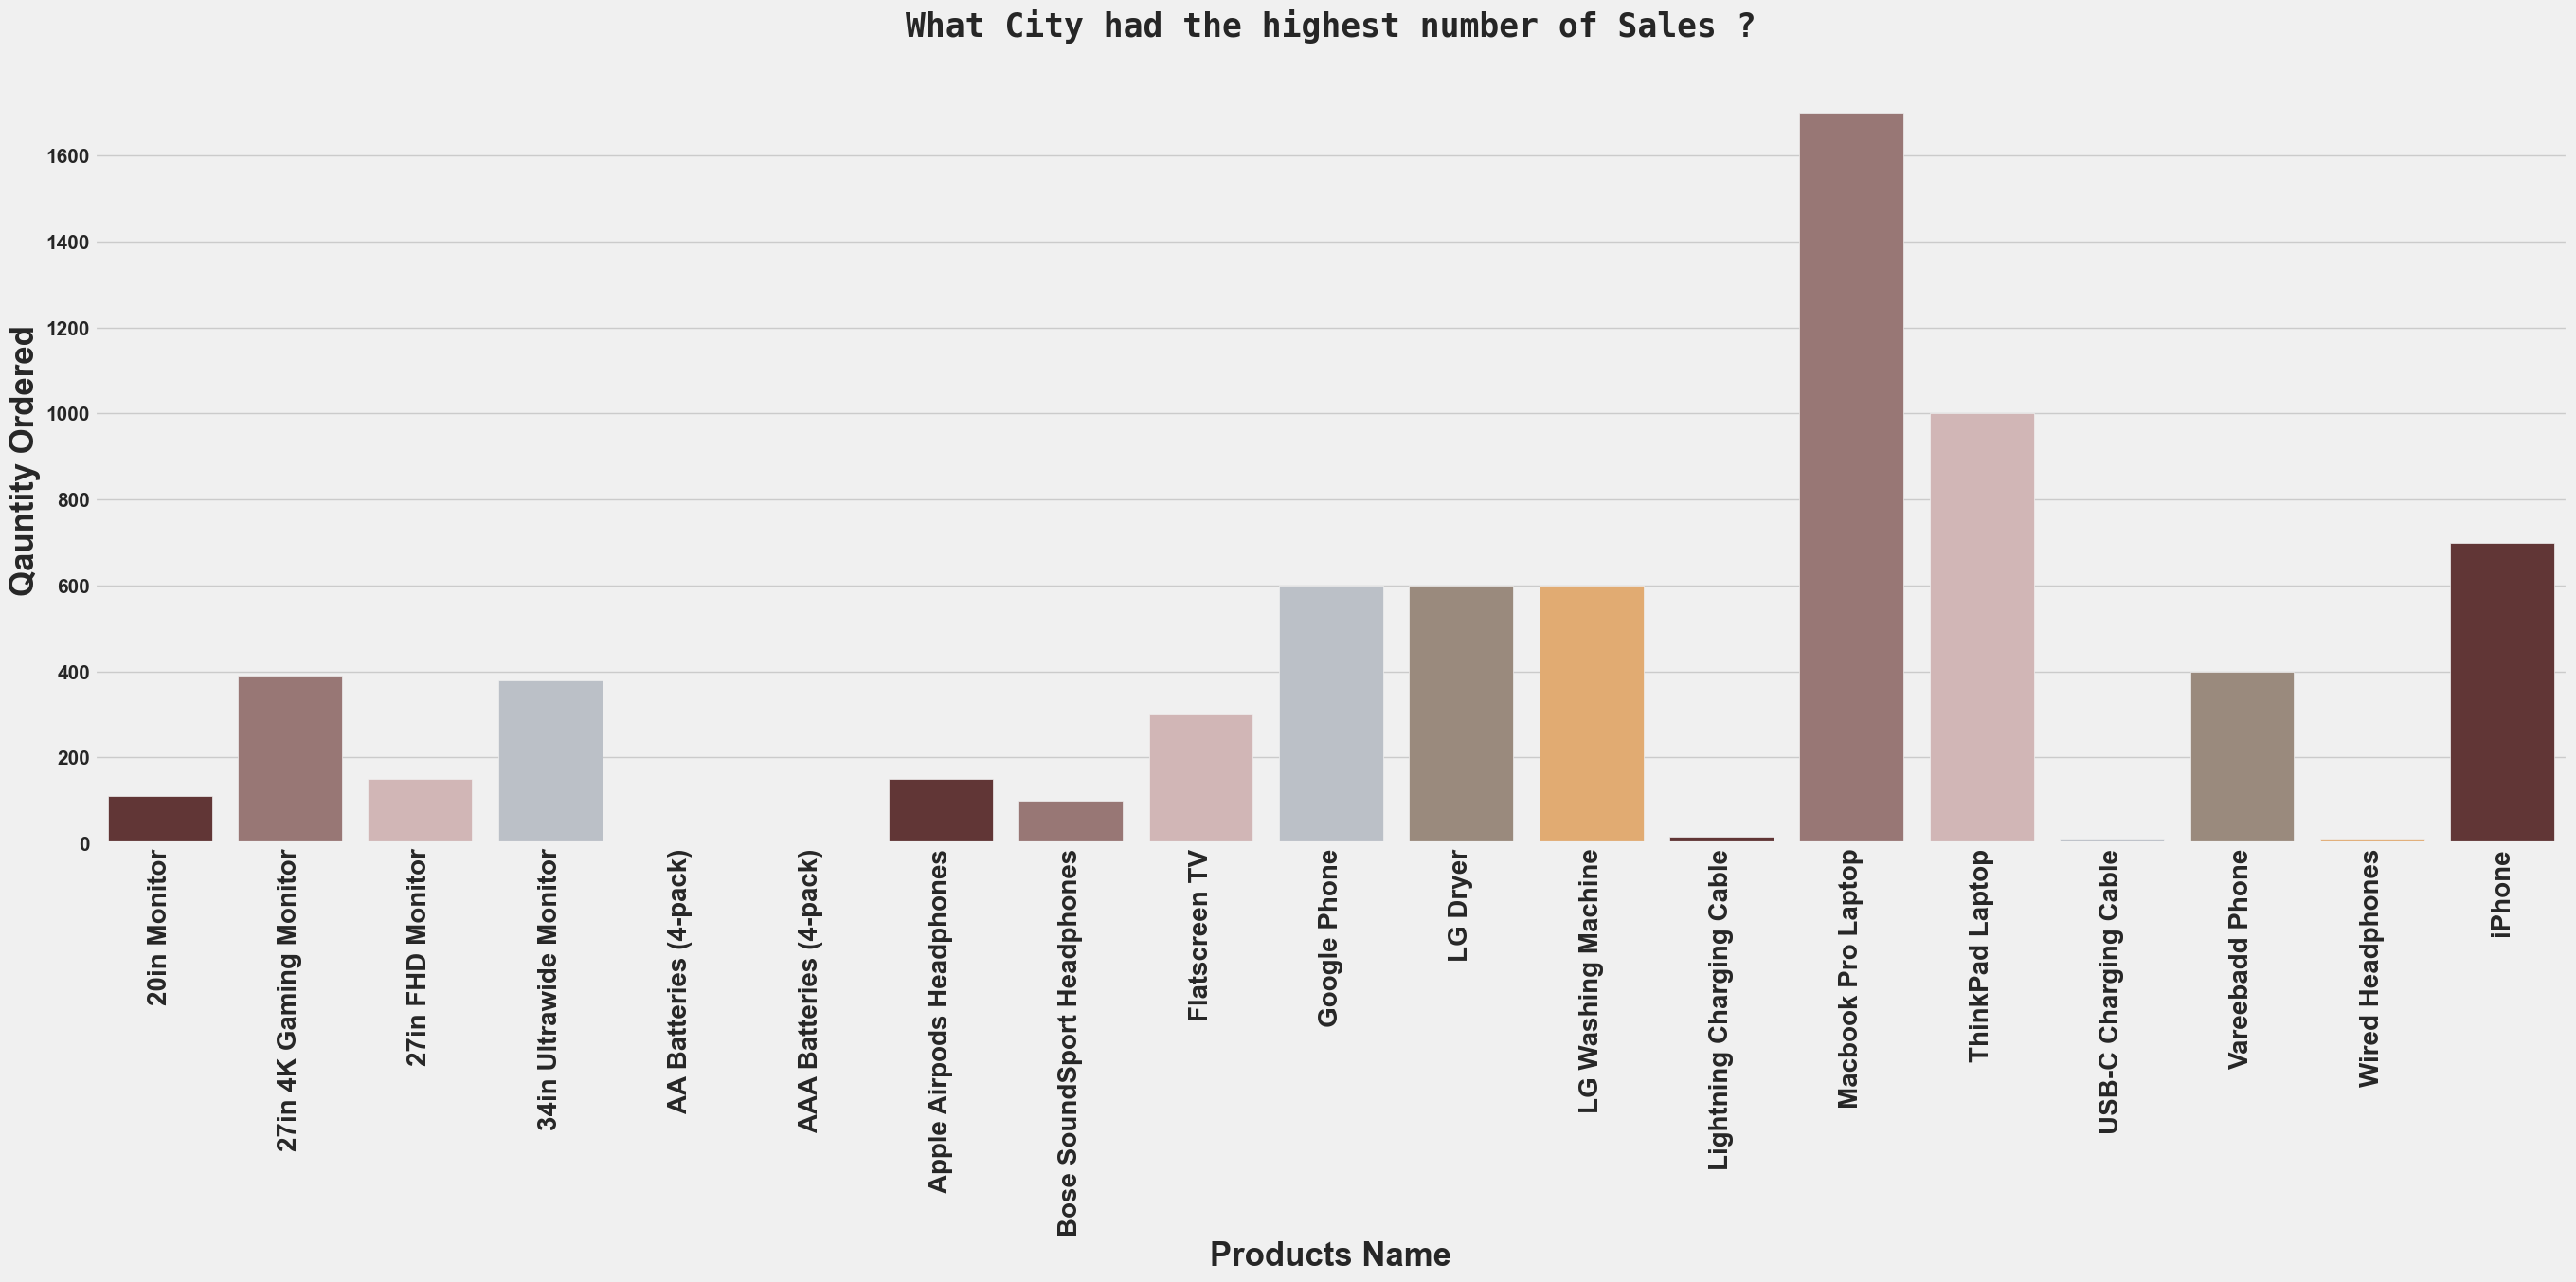

In [26]:
# group the Month cols
products = df.groupby('product').sum().astype('int')
prices = df.groupby('product')['price_each'].mean()
# let's plot it
plt.figure(dpi=100, figsize=(30, 10)) # figuring the size

# makes bar plot 
sns.barplot(x = products.index, y = prices, data = products, palette = color)

# putting the title:
plt.title('What City had the highest number of Sales ?', fontname = 'monospace', weight= 'bold', fontsize=25, pad=30)

# putting the xlabel:
plt.xlabel('Products Name', weight= 'bold', fontsize = 25, loc = 'center')

# putting the xticks :
plt.xticks(weight= 'bold', fontsize = 20, rotation = 'vertical')

# putting the ylabel:
plt.ylabel('Qauntity Ordered', weight= 'bold', fontsize = 25, loc = 'center')

# putting the yticks :
plt.yticks(weight= 'bold', fontsize = 15)

plt.show();

> Its obviously because the five products I just mentioned had low price comparing to the other who had price over $600.

<a id="pro"></a>

## What products are most often sold together?

In [27]:
from itertools import combinations
from collections import Counter

In [28]:
# drop it using duplicated() funct
data = df[df['order_id'].duplicated(keep=False)]

# Create a new column (Grouped):
data['Grouped'] = df.groupby('order_id')['product'].transform(lambda x: ",".join(x))

# let's make a new variable
data = data[['order_id','Grouped']].drop_duplicates()


# create a new variable for counter:
count = Counter()

# make a for loop :
for row in data['Grouped']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    
# make another for loop :
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


>  In the first rank the Products are mostly often sold togther are `Iphone and Lightning charging cable` which sold **1005 orders**, In the second rank `Google Phone and USB-C Charging Cable` products which sold **987 orders**.

# How Much Probability?

In [29]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

product_prob = df['product'].value_counts().sum()

<a id="USB"></a>

## How much probability for next people will ordered USB-C Charging Cable?

In [30]:
usb_charging = df[df['product'] == 'USB-C Charging Cable'].value_counts().sum()

# calculating the USB probability :
p_usb = statistical_probability(usb_charging, product_prob)
Pprime_usb = 1 - p_usb

print("Probability of the Customers that will order USB-C Charging Cable: %.2f%%" % p_usb)
print("Probability of the Customers that will not order USB-C Charging Cable: %.2f%%" % Pprime_usb)

Probability of the Customers that will order USB-C Charging Cable: 0.12%
Probability of the Customers that will not order USB-C Charging Cable: 0.88%


## Answer:
> The Probability of the Customers that will order USB-C Charging Cable is **12%**, and this is **Unusual Event** because it has just 12% chance, and **88%** Customers will not order it.

<a id="iphone"></a>

## How much probability for next people will ordered iPhone?

In [31]:
iphone = df[df['product'] == 'iPhone'].value_counts().sum()

# calculating the USB probability :
p_iphone = statistical_probability(iphone, product_prob)
Pprime_iphone = 1 - p_iphone

print("Probability of the Customers that will order Iphone: %.2f%%" % p_iphone)
print("Probability of the Customers that will not order Iphone: %.2f%%" % Pprime_iphone)

Probability of the Customers that will order Iphone: 0.04%
Probability of the Customers that will not order Iphone: 0.96%


## Answer :
> The Probability of the Customers that will order Iphone is **4%**, and this is **Unusual Event** because it has just 4% chance that will happen, and **96%** Customers will not order it .

<a id="google"></a>

## How much probability for next people will ordered Google Phone?

In [32]:
google = df[df['product'] == 'Google Phone'].value_counts().sum()

# calculating the USB probability :
p_google = statistical_probability(google, product_prob)
Pprime_google = 1 - p_google

print("Probability of the Customers that will order Google Phone: %.2f%%" % p_google)
print("Probability of the Customers that will not order Google Phone: %.2f%%" % Pprime_google)

Probability of the Customers that will order Google Phone: 0.03%
Probability of the Customers that will not order Google Phone: 0.97%


## Answer:
> The Probability of the Customers that will order Google Phone is **3%**, and this is **Unusual Event** because it has just 3% chance, and **97%** Customers will not order it.

<a id="head"></a>

## How much probability other peoples will ordered Wired Headphones?

In [33]:
wired = df[df['product'] == 'Wired Headphones'].value_counts().sum()

# calculating the USB probability :
p_wired = statistical_probability(wired, product_prob)
Pprime_wired = 1 - p_wired

print("Probability of the Customers that will order Wired Headphones: %.2f%%" % p_wired)
print("Probability of the Customers that will not order Wired Headphones: %.2f%%" % Pprime_wired)

Probability of the Customers that will order Wired Headphones: 0.10%
Probability of the Customers that will not order Wired Headphones: 0.90%


## Answer:
> The Probability of the Customers that will order Wired Headphones is **10%**, and this is **Unusual Event** because it has just 10% chance, and **90%** Customers will not order it.

<a id="Conclusion"></a>

# Conclusion

- The best month for sales was **December**  which has a record number of sales reaching **$4.613.443**. This may be because in December there is Christmas and New year.

-  The city that had the highest number of sales is **San Francisco** with **$8.262.204** sales.

- the best time to display adverstisement at **11am or 12pm** because there is an increase in the number of orders at that time. 

- The products were sold the most are : 1. AAA Batteries (4-pack), 2. AA Batteries (4-pack), 3. Lightning Charging Cables, 4. USB-C Charging Cable, 5. Wired Headphones

- These products were sold the most because they had low price comparing to the other who had price over $600.
